In [1]:
%run Latex_macros.ipynb
%run beautify_plots.py

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import neural_net_helper
%aimport neural_net_helper

nnh = neural_net_helper.NN_Helper()

nn_ch = neural_net_helper.Charts_Helper(save_dir="/tmp", visible=False)

In [4]:
# Create files containing charts
create = False

if create:
    file_map = nn_ch.create_charts()
    print(file_map)

# Recap of "Classical" Machine Learning

Canonical Machine Learning tasks
- Classification
 - Given attributes, predict a target value from among a *discrete* set of values
- Regression
 - Given attributes, predict a target value from a *continuous* range of values
   


To solve the task 
- We create a *parameterized* model: mapping from input features to label/target
- Fit the model parameters on 
a collection of examples (feature/target pairs) 


$$ \langle \X, \y \rangle= [ \x^\ip, \y^\ip | 1 \le i \le m ]$$

- Use the fitted model to predict a $\hat{\y}$ from an unseen feature vector $\x$

It is often the case that we can make our model more successful (e.g. more accurate) by
- rather than using raw inputs $\x$
- we transform the raw inputs 
- fit our model and make predictions on the transformed feature vectors



To illustrate, consider some features describing a person
- Height
- Weight
- Income

Our goal is to predict the target: some measure of Happiness.


Extremely small differences in Height or Weight probably don't affect Happiness.

We may choose to transform each variable from a continuous value to a discrete value
- Height transformed to Height Bucket: { Short, Medium, Tall }
- Weight transformed to Weight Bucket: { Thin, Just Right, A Little Extra }


It is sometimes the case that each variable individually is a poor predictor, but the combination is powerful.

In such a case, a transformation that creates a new "combination" feature may be helpful
- Create a discrete binary variable Combo indicating "Perfect Height and Perfect Weight"

The absolute level of Income may not be as good a predictor of Happiness as the level relative to one's peers
- We may choose to transform Income into Relative Income: Income/(Median Income)

By fitting/training on 
- (Height Bucket, Weight Bucket, Combo, Relative Income) 
- rather than (Height, Weight,Income)
our model might make
better predictions.

This process of transforming/augmenting input features is called *feature engineering*
- In Classical Machine Learning, it is the responsibility of the person fitting the model

In "Classical" Machine Learning (ML) the paradigm is to
- *Manually* create a sequence of transformations from raw input to an alternate representation
    - Feature engineering: create representations corresponding to "concepts" expressed by the data
    - A sequence of transformations a *pipeline*
- The final representation created by the sequence may result in a better prediction than that which could be obtained from the raw representation

We continue to use our
[Basic Notational standards](ML_Notation.ipynb)
from the Classical ML part of the course.

This will be extended to Deep Learning.


# Deep Learning: Introduction

We introduce the topic of Deep Learning
- by comparing and contrasting it to Classical Machine Learning

## How are tasks defined 

The objectives of Deep Learning are similar to that of Classical ML
- to solve tasks

In Classical ML  we confined the tasks to Regression and Classification.


In Deep Learning, the task is *implicitly* defined by the Loss Function


Recall the "Neural Style Transfer" task

<table>
    <tr>
        <td><center><strong><font size=4>Content</font></strong></center></td>
        <td><strong></strong></td>
        <td><center><strong><font size=4>Style</font></strong></center></td>
    </tr>
    <tr>
        <td><img src=images/chicago.jpg width=95%></td>
        <td><center><strong><font size=14>+</font></strong></center></td>
        <td><img src=images/starry_night_crop.jpg width=75%></td>
    </tr>
    <td></td>
    <td><center><strong><font size=14>=</font></strong></center></td>
    </tr>
    <tr>
        <td></td>
        <td><center><strong><font size=4>Content depicted in given Style</font></strong></center></td>
    </tr>
    <tr>
        <td></td>
        <td><img src=images/chicago_starry_night.jpg width=100%></td>
    </tr>
</table>

What does it mean to "depict the Content image in the style of the Style image" ?

We define a "solution" $\vec{x}$ to this task
- as an image vector $\vec{x}$
- that minimizes a Loss Function
$$
\loss = \loss_{\text{content}}(\vec{p}, \vec{x}) + \loss_{\text{style}}(\vec{a}, \vec{x})
$$
- that we have created to capture the meaning of Neural Style Transfer

As defined by the 2 part Loss Function, a solution to the Neural Style Transfer task
- is similar to the Content image in appearance
    - the Content Loss
- has a style similar to the Style image

The *task is defined* by the Loss Function.
- we defer the details of $\loss_{\text{content}}$ and $\loss_{\text{style}}$

There are no constraints on the Loss Functions of Deep Learning.

In contrast, in Classical ML
- Loss Functions were well-defined, limited mathematical formulae
- often chosen for being amenable to closed-form or simple methods for solution

As a simplification
- In this course, we will (mostly) limit our tasks to Regression and Classification.



## How is computation defined

Another difference between Classical ML and Deep Learning
- the computations in Deep Learning are implemented by a network of nodes
    - the *Neural Network*
    - rather than an imperative program
        - sequence of operations (e.g., Python)
- the nodes implement a limited number of computations
    - *simple*: dot-product
    - *parameterized*

The network is described by computation graph, which can be an arbitrary Directed Acyclic Graph.

<br>
<table>
    <tr>
        <td><center><strong>Functional architecture</strong></center></td>
    </tr>
    <tr>
        <td>
            <img src="images/tf_functional_arch.png">
        </td>
    </tr>
</table>

In this course
- we limit the graph to a *linear sequence* of nodes
    - called *layers*

<br>
<table>
    <tr>
        <td><center><strong>Sequential architecture</strong></center></td>
    </tr>
    <tr>
        <td>
            <img src="images/tf_sequential_arch.png">
        </td>
    </tr>
</table>

This restriction limits  graphs to implementing what is called the 
- *Sequential* architecture.
- the simplicity mainly has notational advantages
- many layers: "deep" learning

In the Advanced Deep Learning course, we remove this restriction, creates what is know as
- the *Functional* architecture

**Aside**

This sequential organization restricts the types of functions (and tasks we can solve) that can be implemented

Letting $F_\llp$ denote the simple function computed by the node at layer $\ll$ and
$\W_\llp$  its parameters ("weights") 
- the network can compute functions defined by function compositions

$$
\begin{array}[lll]\\
\y_\llp & = & F_\llp( \y_{(\ll-1)}; \W_\llp ) \\
& = &  F_\llp( \; F_{(\ll-1)}( \y_{(\ll-2)}; \,\W_{(\ll-1)} ); \,\W_\llp \;) \\
& = &  F_\llp( \; F_{(\ll-1)}( \; F_{(\ll-2)}( \y_{(\ll-3)}; \,\W_{(\ll-2)} ); \,\W_{(\ll-1)} \;  ); \W_\llp \;) \\
& = & \vdots \\
\end{array}
$$


These limitations in architecture and tasks enables a 
 paradigm very similar to that of Classical Machine Learning
- a sequence of transformations
- that transforms the input
- such that the final representation 
- results in better predictions
- by a final layer that implements either Regression or Classification

We shall frequently say that
- the purpose of a Layer
- is to create an *alternate representation* of the input
    - no new information not present in the input is created
        
Here is a "cartoon" diagram of Deep Learning (as applied to the Classification task)

<div>
    <center><strong>Layers</strong></center>
    <br>
    <!-- edX: Original: <img src="images/NN_Layers.png"> replace by EdX created image -->
    <img src="images/W12_L1_NN_layers1920by1080.png">
</div>

- A sequence of *layers* (vertical boxes)
- Starting with the input layer (the large vertical box on the left)
<div>
    <br>
    <!-- edX: Original: <img src="images/NN_Layers.png"> replace by EdX created image -->
    <img src="images/Layers_W8_L2_Sl12_1.png" width=20% align="left">
</div>

- Intermediate layer $\ll$ takes as input the output of layer $(\ll -1)$
    - this is the limitation imposed by the Sequential architecture
- Transforming it into an alternate representation
- via a *simple pre-defined* function $f_\llp$

<div align="middle">
    <br>
    <!-- edX: Original: <img src="images/NN_Layers.png"> replace by EdX created image -->
    <img src="images/Layers_W8_L2_Sl12_2.png" width=40%>
</div>

- The output of the penultimate layer $(L-1)$
is used as input to a final layer $L$ that implements either
    - Classification
    - Regression
    
<div align="right">
    <b>
    <!-- edX: Original: <img src="images/NN_Layers.png"> replace by EdX created image -->
    <img src="images/Layers_W8_L2_Sl13.png" width=40% align="right">
    </center>
    </div>

The process of moving through the layers from Input to penultimate is
- Successive transformation of the input
- Each layer's output is an alternate *representation* of the input

<div>
    <!-- edX: Original: <img src="images/NN_Layers.png"> replace by EdX created image -->
    <img src="images/W12_L1_NN_layers1920by1080.png">
    
</div>

- This is similar to the Feature Engineering pipeline of Classical ML
    - Implemented in many ML toolkits (e.g., `sklearn`)
- Where the final version of the transformed data is fed into a Classifier/Regression model


## Per-layer functions may be non-linear

Another **key difference** from Classical Machine Learning
- the functions $f_\llp$ can be **non-linear**

We will see, in a later module, the importance of non-linearity.

## The behavior of the per-layer functions is learned, not pre-specified

Finally, a major difference
- in Classical ML: the Data Scientist explicitly defines the transformations
- in Deep Learning
    - the transformations are achieved
    - by a composition of the per-layer functions of successive layers
    - *without pre-specifying* the goal of the transformation !
    
The Deep Learning transformations
- are defined by the parameters of the per-layer functions $f_\llp$
- which are *learned* by training

One difficulty with learning the transformations
- they tend to work
- but **we don't necessarily know what they mean**

Because the behavior of the model is *learned* from the Training Examples
- the model behavior is more sensitive to the Training Data
- compared to Classical ML

This is because
- in Classical ML we can sometimes specify the *functional form* of the model or its transformations

For example: in our initial examples for Linear Regression (predict House Price from Size)
- we initially specified a first order polynomial as the functional form
$$
\y = \Theta_0 + \Theta_1 \x
$$

When this proved insufficient, we changed the functional form to a second order polynomial
$$
\y = \Theta_0 + \Theta_1 \x + \Theta_2 \x^2
$$

In the absence of an explicit specification of the functional form
- the model infers the form from the Training Data

Consider a complex form

<IPython.core.display.Javascript object>


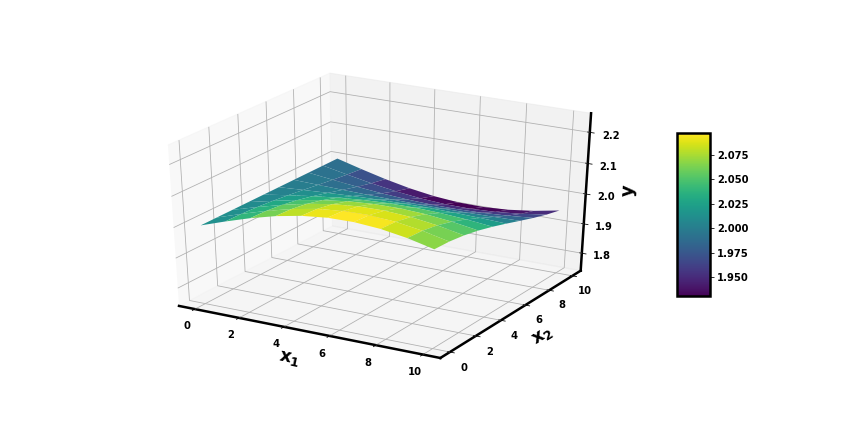

In [5]:
%matplotlib notebook

fig, ax = nn_ch.draw_surface(visible=True)


If the range of the features $\x = (\x_1, \x_2)$ is not sufficiently varied
- the shape that we are defining *by example*
- is only a partial picture of the true shape

<table>
    <tr>
        <td>
            <img src="images/surface_chart_1.png" width=75%>
        </td>
    </tr>
    <tr>
        <td>
            <img src="images/surface_chart_2.png"  width=75%>
        </td>
    </tr>
</table>

## Deep Learning is implemented by special libraries

The computation graphs are defined by a specialized language (really a Python library)
- *TensorFlow*
- *PyTorch*

All operations in Deep Learning
- must be operations of these specialized languages
- not pure Python

As we will see, the reason for restricting the operations
- the minimization of the Loss Function will be by Gradient Descent
- thus, we must be able to compute the Gradient of every operation
- operations are chosen and implemented such that
    - *Gradients are automatically computed* by the language

## Summary

Deep Learning
- tasks defined by arbitrary Loss Functions
- computation via a Graph of nodes
    - nodes implement *simple* pre-defined functions $f_\llp$
    - functions $f_\llp$ are parameterized
    - functions may be non-linear
- the computation is *learned* rather than pre-specified
    - training sets the parameters of the per-layer functions
    - so as to minimize the Loss Function
- specialized language to enable automated computation of Gradients of operations
    - "Learning": find Loss-minimizing values of all parameters, via Gradient Descent

# What does a layer do ?

The above was very informal.

We need to introduce more concepts and, unfortunately, the notation that will carry us through
the Deep Learning part of the course.

Time to go [under the covers of a layer](Intro_to_Neural_Networks.ipynb)

# Intuition

With this pattern/template matching intuition in mind, let's revisit our path through the layers.

Let's start with the inputs to the NN: an example with our original features



<div>
    <br>
    <!-- edX: Original: <img src="images/NN_Layers.png"> replace by EdX created image -->
    <img src="images/Layers_W8_L2_Sl12_1.png" width=30% align="left">
</div>

Layer $1$ is attempting to match our input $\x$ against $n_{(1)}$ patterns.

So $\y_{(1)}$ is a vector of synthetic features (an alternate representation of $\x$)
- where each feature in $\y_{(1)}$
is an indicator as to whether a particular pattern appears in $\x$.


Layer $\ll$ works similarly except that the patterns it matches are against synthetic feature in $\y_{(\ll-1)}$ rather than $\x$.

<div align="middle">
    <br>
    <!-- edX: Original: <img src="images/NN_Layers.png"> replace by EdX created image -->
    <img src="images/Layers_W8_L2_Sl12_2.png" width=50%>
</div>

One interpretation/theory of how Deep Learning works
- the patterns of layer $\ll$ are more complex patterns
- composed from the simpler patterns of layer $(\ll-1)$

So, as we proceed deeper into the network
- we create *synthetic features* (the alternate representation) of increasing complexity
- such that the alternate representation of penultimate layer $(L-1)$
- is sufficient for the layer $L$ head (Regression/Classifier) to succeed

<div align="middle">
    <center><strong>Features by layer</strong></center>
    <br>
    <!-- edX: Original: <img src="images/Layer_features.png"> replace by EdX created image -->
    <img src="images/ThreeLayers_W8_L2_Sl21.png" width=20%>
</div>

# What is $W_\llp$ ? Where did $\Theta$ go ?

Our old friend the dot product is back in the forefront.

But now, the pattern matching is written
$$
\W_{\llp,j} \cdot \y_{(\ll-1)}
$$
rather than the 
$$
\Theta \cdot \x
$$
which was familiar in the Classical Machine Learning part of the course.

$\y_{(\ll-1)}$ appears rather than $\x$
- since, in the Sequential architecture
- the input to layer $\ll$ is the output of layer $(\ll-1)$

But why did the denotation of the "pattern" change from $\Theta$ to $\W$ ("weights")

Unfortunately, this is an artifact of two different communities working independently
- The Classical Machine learning community uses the term *parameters* and the Greek letter $\Theta$
- The Computer Science community uses the term *weights* and the letter $W$

They are *exactly the same thing*.

## Size of $\W$: Always count the number of parameters !

When constructing a layer of a Neural Network: **always count the number of weights/parameters. They grow quickly !!**

For a Fully Connected/Dense layer $\ll$
- Consists of $n_\llp = || \y_\llp ||$ units, each unit producing a new feature
- Each unit performs the dot product 
$$
\y_{\llp,j} = \y_{(\ll-1)} \cdot \W_{\llp,j}
$$
- Each dot product thus involves $|| \y_{(\ll-1)} || +1 $ weights in $\W_{\llp,j}$
    - the "+ 1" is because of the bias term in each unit
- Thus the number of weights in $\W_\llp$ is $|| \y_\llp || * (|| \y_{(\ll-1)} || + 1)$



# Activation functions

At this point perhaps you have a mechanical understanding of a neural network
- A sequence of layers
- Each layer is creating new features
- Subsequent layers creating features of increasing complexity but transforming the prior layer's features
- A new feature is created by a linear dot product followed by an non-linear activation

It turns out that the non-linear activation function is *one of the keys* to Neural Networks !

Let's explore [Activation functions](Neural_Networks_Activations.ipynb) in more depth.

# Final layer: Regression/Classification

The Head Layer (layer $L$)
- takes the final representation of the data
- applies a layer determined by the task
    - Regression
    - Classification
<div>
    <!-- edX: Original: <img src="images/NN_Layers.png"> replace by EdX created image -->
    <img src="images/W12_L1_NN_layers1920by1080.png">
    
</div>

- Regression is nothing more than a dot product
    - $
\y_{L} = \y_{(L-1)} \cdot \W_{L}
$
    - Implemented by a Fully Connected layer with **no** activation
- Classification is nothing more than a dot product followed by a sigmoid activation
    - $
\y_{L} = \sigma( \y_{(L-1)} \cdot \W_{L} )
$
    - Exactly the same way as discussed in our "Classical" Machine Learning lecture
    - Implemented by a Fully Connected layer with a sigmoid activation

We will see this explicitly when we show the code for each of these tasks.

# Questions to consider

Some natural questions to ask at this point
- How many layers should we have ( What is the right value for $L$) ?
- How many units $n_\llp$ should I have for each layer $1 \le \ll \le (L-1)$ ?
- What activation function should I use for each unit?

We will address each of these in the future.

Perhaps the biggest question
- $\W_{\llp,j}$ is the pattern used to recognize the feature created by unit $j$ of layer $\ll$
- How does $\W_{\llp,j}$ get set ?
    - i.e., how do we "learn" $\W_{\llp,j}$


This will be the topic of the next section.

# Training a Neural Network

We will start to answer the question of how $\W$ is determined.

The short answer:
- we find the weights that minimize the Loss Function
- using Gradient Descent

We will briefly [introduce training a Neural Network](Neural_Networks_Intro_to_Training.ipynb).
- our initial focus will be on the mechanics
- the process by which the gradient is calculated will be the subject of a separate module.


# Tensorflow: A toolkit for Neural Networks

Why do we need a dedicated toolkit (Tensorflow) to aid the programming of Neural Networks ?

It's mainly about the use of Gradient Descent in training the network.

Recall that a Neural Net (including one augmented by a Loss Layer) is doing nothing more than compute a function.

Gradient Descent needs to take the gradient of this function (evaluated on a mini batch of examples) in order to update the weights $\W$.

There are at least two ways to obtain the Gradient
- Numerically
- Analytically

Numerical differentiation applies the mathematical definition of the gradient
$$
\frac{\partial f(x)}{\partial x} = \frac{ f(x + \epsilon) - f(x) }{\epsilon}
$$

- It evaluates the function twice: at $f(x)$ and $f(x+\epsilon)$

- This can get expensive, especially since
    - $\x$ is a vector
    - Potentially very long (e.g., many features)
    - We need to evaluate the derivative of $f(\x)$ with respect to each $\x_j$

Analytic derivatives are how you learned differentiation in school
- As a collection of rules, e.g.,
$$
\frac{\partial (a + b)}{\partial x} = \frac{\partial a}{\partial x} + \frac{\partial b}{\partial x}
$$

This is very efficient.

The issue in ordinary  code
- The expression `(a + b) * c`
- Is evaluated `tmp = a + b`
- And the result passed to the next step of the computation, e.g, `tmp * c`
- Losing the connection between `tmp` (a value) and the operation (plus) and addends (`a`, `b`)

There is no information recorded in ordinary code that would allow the application of analytic rules of differentiation.

Tensorflow is different in that `(a + b) * c`
- Is a symbolic expression (i.e., recorded as operation and arguments)
- That is saved
- Facilitating the application of analytic rules of differentiation

We still write `(a + b) * c` but it really results in something like:
- `tf.math.mult( tf.math.add(a, b), c)`

The expression 
>`tf.math.add(a, b)`

can be differentiated analytically because it records
- the arguments are `a, b`
- the operation is addition
- we know the derivative of an addition operation
    

So Tensorflow facilitates analytic function differentiation while hiding the details from the user.
- We will see some pseudo-code that shows how this is done
- Check out the [Deeper Dive on Computation Graphs](Computation_Graphs.ipynb) if you want to know more

By the way: what is a Tensor ?  It is an object with an arbitrary number of dimensions.

We use special cases all the time:
- A scalar is a tensor of dimension $0$
- A vector is a tensor of dimension $1$
- A matrix is a tensor of dimension $2$

As you've seen, we are already dealing with higher dimensional objects.

Consider $\y$:
- $\y_{\llp, j, j'}$
    - Output of layer $\ll: \y_\llp$
    - Unit $j$ of layer $\ll: \y_{\llp, j}$
    - Element $j'$ of the output of unit $j$ of layer $\ll: \y_{\llp, j, j'}$

In the future we will talk about *sequences* of $\y$, thus adding another dimension: time.

And, don't forget, the "batch index" dimension
- Tensorflow processes *mini-batches* of examples, not singeltons
- $\y^\ip_{\llp, j, j'}$
    - Element $j'$ of the output (given input examples $i$) of unit $j$ of layer $\ll: \y_{\llp, j, j'}$

The notation will become a little heavy but hopefully understandable as a way of indexing a high dimension object.

# Some "Why's ?"

## What took so long: Preview

An historical perspective:

- Perceptron invented 1957
- mid-1970's: First "AI Winter"
- Late 1980's: second "AI Winter"
- 2010: Re-emergence of AI

The promise of AI led to great expectations, that were ultimately unfulfilled.
The difficulty was the inability to train networks.

We will defer a fuller answer to a later lecture.

For now: seemingly minor choices were more impactful than imagined
- Sigmoid as activation function turned out to be a problematic choice
- Initializing $\W$ properly was more important than imagined

- Vanishing/Exploding Gradients
    - problems arise when the gradient is effectively  0
    - problems also occurs when they are effectively infinite

- Computational limits
    - It turns out to be quite important to make your NN big; bigger/faster machines help
    - Actually: bigger than it needs to be
        - many weights wind up near $0$, which renders the neurons useless
        - [The Lottery Ticket Hypothesis](https://arxiv.org/abs/1803.03635)
            - within a large network is a smaller, easily trained network
            - increasing network side increases the chance of large network containing a trainable subset
            - [summary](https://towardsdatascience.com/how-the-lottery-ticket-hypothesis-is-challenging-everything-we-knew-about-training-neural-networks-e56da4b0da27)


## Why do GPU's matter ?

GPU (Graphics Processing Unit): specially designed hardware to perform repeated
vector multiplications (a typical calculation in graphics processing).

- It is not general purpose (like a CPU) but does what it does extremely quickly, and using many
more cores than a CPU (typically several thousand).

- As matrix multiplication is a fundamental operation of Deep Learning, GPU's have the ability to greatly
speed up training (and inference).

Google has a further enhancement called a [TPU](https://cloud.google.com/tpu/docs/tpus) (Tensor Processing Unit) to speed both training and inference.
-  highly specialized to eliminate bottlenecks (e.g., memory access) in fundamental Deep Learning matrix multiplication.

Both GPU's and TPU's 
- Incur an overhead (a "set up" step is needed before calculation).
- So speedup only for sufficiently large matrices, or long "calculation pipelines" (multiplying 
different examples by the same weights).

DL involves 
- Multiplying large matrices (each example) 
- By large matrices (weights, which are same for each example in batch)
- Both GPU's and TPU's offer the possibility of large speed ups.

- GPU's are **not** necessary
    - but they are a **lot** faster
    - life changing experience
        - 30x faster means your 10 minute run (that ended in a bug) now only takes 20 seconds
     - increases your ambition by faster iteration of experimental cycle  

In [6]:
print("Done")

Done
